IMPORTING DATASET FOROM KAGGLE

In [1]:
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
! kaggle datasets download -d ealaxi/paysim1

Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1
License(s): CC-BY-SA-4.0
 95% 168M/178M [00:01<00:00, 113MB/s] 
100% 178M/178M [00:01<00:00, 100MB/s]


In [4]:
! unzip paysim1.zip

Archive:  paysim1.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [5]:
import pandas as pd
df= pd.read_csv('PS_20174392719_1491204439457_log.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# DATASET ANALYSIS

In [6]:
df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [7]:
import plotly.express as px
df_Fraud=df[df["isFraud"]==1]
cut_counts = df_Fraud['type'].value_counts()
fig = px.bar(x=cut_counts.index, y=cut_counts.values)
fig.show()

In [8]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
df["nameOrig"].str[:1].unique()

array(['C'], dtype=object)

In [10]:
df["nameDest"].str[:1].unique()

array(['M', 'C'], dtype=object)

# DATASET PREPROCESSING


##USING ONE-HOT ENCODING(TO COVERT CATEGORICAL DATA INTO NUMERICAL VALUE)

In [11]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['type'])
# Drop column B as it is now encoded
df = df.drop('type',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True


In [12]:
df=df.drop('nameOrig',axis=1)

In [13]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['nameDest'].str[:1])
# Drop column B as it is now encoded
df = df.drop('nameDest',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,False,True
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,False,True
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,True,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,True,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,True,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False


##UNDERSAMPLING THE DATASET TO MATCH THE CLASSES OF FRAUD AND NOT FRAUD

In [14]:
df["isFraud"].sum()

8213

In [15]:
df_fraud=df[df["isFraud"]==1]
df_fraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
2,1,181.00,181.00,0.0,0.00,0.00,1,0,False,False,False,False,True,True,False
3,1,181.00,181.00,0.0,21182.00,0.00,1,0,False,True,False,False,False,True,False
251,1,2806.00,2806.00,0.0,0.00,0.00,1,0,False,False,False,False,True,True,False
252,1,2806.00,2806.00,0.0,26202.00,0.00,1,0,False,True,False,False,False,True,False
680,1,20128.00,20128.00,0.0,0.00,0.00,1,0,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.0,0.00,339682.13,1,0,False,True,False,False,False,True,False
6362616,743,6311409.28,6311409.28,0.0,0.00,0.00,1,0,False,False,False,False,True,True,False
6362617,743,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0,False,True,False,False,False,True,False
6362618,743,850002.52,850002.52,0.0,0.00,0.00,1,0,False,False,False,False,True,True,False


In [16]:
df_notFraud=df[df["isFraud"]==0].sample(n=8213)
df_notFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
1101668,130,194861.80,21119.00,215980.80,0.00,0.00,0,0,True,False,False,False,False,True,False
4128265,302,15542.20,43728.00,28185.80,0.00,0.00,0,0,False,False,False,True,False,False,True
6348902,695,126759.75,380853.45,507613.20,3100863.96,2974104.20,0,0,True,False,False,False,False,True,False
4363835,310,87369.98,230566.22,317936.20,122422.02,35052.05,0,0,True,False,False,False,False,True,False
6295551,670,15066.98,263828.66,248761.67,0.00,0.00,0,0,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5763869,400,230341.68,279240.00,509581.68,0.00,0.00,0,0,True,False,False,False,False,True,False
2006950,179,8574.59,0.00,0.00,0.00,0.00,0,0,False,False,False,True,False,False,True
4376661,311,17308.59,10743.00,0.00,0.00,0.00,0,0,False,False,False,True,False,False,True
3029931,233,48706.15,31277.57,0.00,147345.73,196051.88,0,0,False,False,False,False,True,True,False


In [17]:
df_new=pd.concat([df_fraud,df_notFraud])
df_new

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,True,False
251,1,2806.00,2806.00,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False
252,1,2806.00,2806.00,0.00,26202.00,0.00,1,0,False,True,False,False,False,True,False
680,1,20128.00,20128.00,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5763869,400,230341.68,279240.00,509581.68,0.00,0.00,0,0,True,False,False,False,False,True,False
2006950,179,8574.59,0.00,0.00,0.00,0.00,0,0,False,False,False,True,False,False,True
4376661,311,17308.59,10743.00,0.00,0.00,0.00,0,0,False,False,False,True,False,False,True
3029931,233,48706.15,31277.57,0.00,147345.73,196051.88,0,0,False,False,False,False,True,True,False


##NORMALIZING THE NUMERICAL FEATURE COLUMNS

In [18]:
norm_cols=["step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
df_new[norm_cols] = (df_new[norm_cols] - df_new[norm_cols].min()) / (df_new[norm_cols].max() - df_new[norm_cols].min())
df_new

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
2,0.000000,0.000005,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True,False
3,0.000000,0.000005,0.000003,0.000000,0.000090,0.000000,1,0,False,True,False,False,False,True,False
251,0.000000,0.000081,0.000047,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True,False
252,0.000000,0.000081,0.000047,0.000000,0.000111,0.000000,1,0,False,True,False,False,False,True,False
680,0.000000,0.000578,0.000338,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5763869,0.537736,0.006619,0.004686,0.010277,0.000000,0.000000,0,0,True,False,False,False,False,True,False
2006950,0.239892,0.000246,0.000000,0.000000,0.000000,0.000000,0,0,False,False,False,True,False,False,True
4376661,0.417790,0.000497,0.000180,0.000000,0.000000,0.000000,0,0,False,False,False,True,False,False,True
3029931,0.312668,0.001400,0.000525,0.000000,0.000624,0.000828,0,0,False,False,False,False,True,True,False


#IMPLEMENTING DIFFERENT MODELS AND CHECKING THEIR PERFORMANCE


In [19]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

##splitting the dataset

In [20]:
y=df_new["isFraud"]
X=df_new.drop("isFraud",axis=1)
print(y)
print(X)
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

2          1
3          1
251        1
252        1
680        1
          ..
5763869    0
2006950    0
4376661    0
3029931    0
3941237    0
Name: isFraud, Length: 16426, dtype: int64
             step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
2        0.000000  0.000005       0.000003        0.000000        0.000000   
3        0.000000  0.000005       0.000003        0.000000        0.000090   
251      0.000000  0.000081       0.000047        0.000000        0.000000   
252      0.000000  0.000081       0.000047        0.000000        0.000111   
680      0.000000  0.000578       0.000338        0.000000        0.000000   
...           ...       ...            ...             ...             ...   
5763869  0.537736  0.006619       0.004686        0.010277        0.000000   
2006950  0.239892  0.000246       0.000000        0.000000        0.000000   
4376661  0.417790  0.000497       0.000180        0.000000        0.000000   
3029931  0.312668  0.001400       

##LOGISTIC REGRESSION

In [21]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [22]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

0.8186216180972732
Accuracy: 0.8189287888009739


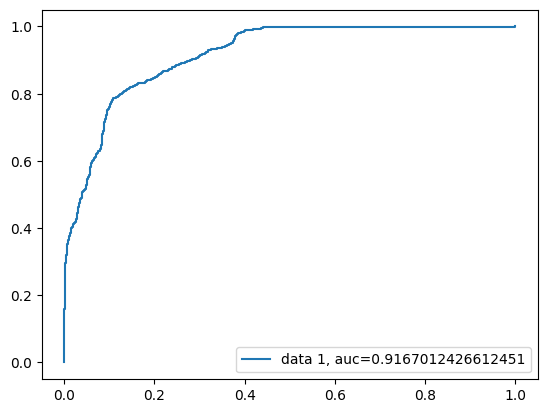

In [23]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

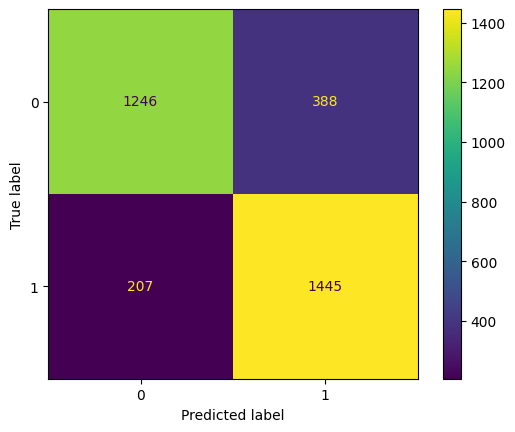

In [24]:
# Generate predictions with the best model

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [25]:
from sklearn.metrics import f1_score
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 0.8186216180972732
Accuracy score: 0.8189287888009739
F1 score: 0.8292682926829268


##RANDOM FOREST

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9933049300060864


In [27]:
param_dist = {'n_estimators': randint(30,800),
              'max_depth': randint(1,30)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Make predictions with the best model
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best hyperparameters: {'max_depth': 22, 'n_estimators': 379}
Accuracy: 0.9930006086427268


ROCAUC score: 0.9929820609861272
Accuracy score: 0.9930006086427268
F1 score: 0.9930618401206636


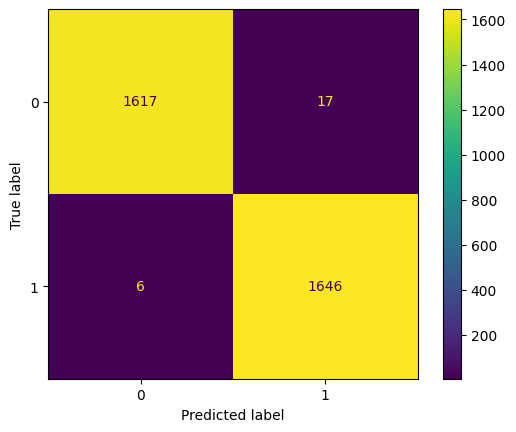

In [28]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)
print('ROCAUC score:',roc_auc_score(y_test,y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

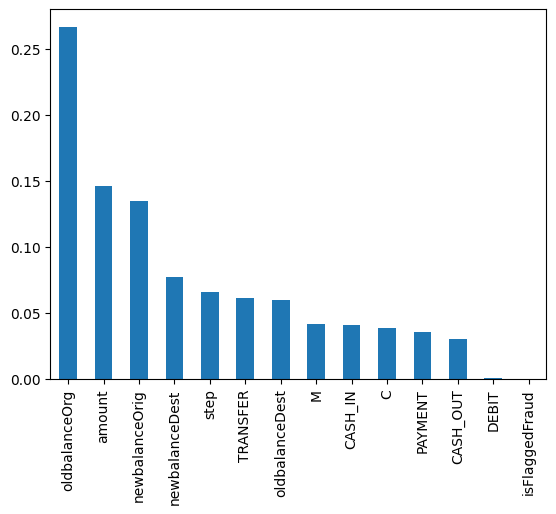

In [29]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

##XGOOST USING SCIKITLEARN LIBRARY

In [30]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.994826536822885


ROCAUC score: 0.9948147121844816
Accuracy score: 0.994826536822885
F1 score: 0.9948655995167622


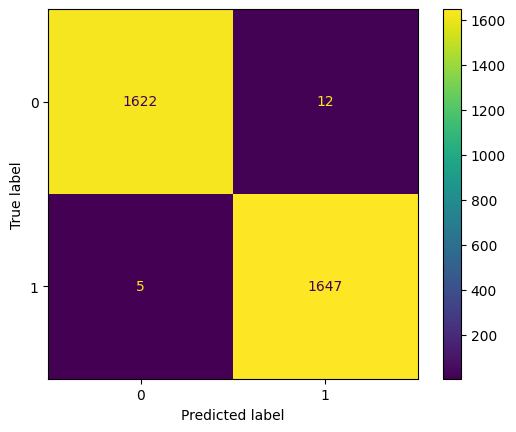

In [31]:
print('ROCAUC score:',roc_auc_score(y_test,y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
cnf_mat= confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cnf_mat).plot();

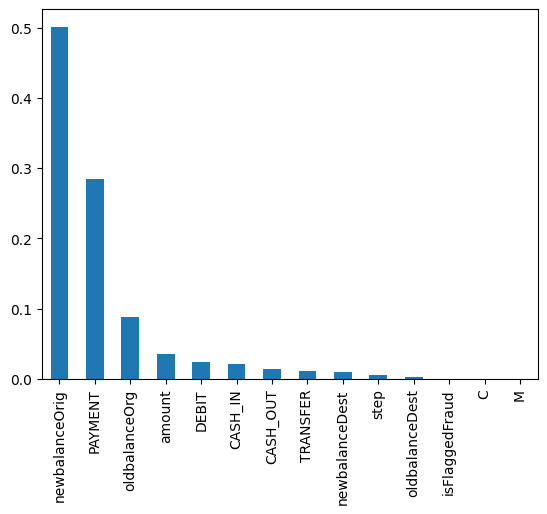

In [32]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

##LightGBM Model

In [33]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate=0.2,max_depth=-5,random_state=8)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],eval_metric='logloss')

[LightGBM] [Info] Number of positive: 6561, number of negative: 6579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1544
[LightGBM] [Info] Number of data points in the train set: 13140, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499315 -> initscore=-0.002740
[LightGBM] [Info] Start training from score -0.002740


LGBMClassifier(learning_rate=0.2, max_depth=-5, random_state=8)

In [34]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))
y_pred = model.predict(X_test)
print('ROCAUC score:',roc_auc_score(y_test,y_pred))
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('F1 score:',f1_score(y_test,y_pred))

Training accuracy 1.0000
Testing accuracy 0.9948
ROCAUC score: 0.9948147121844816
Accuracy score: 0.994826536822885
F1 score: 0.9948655995167622


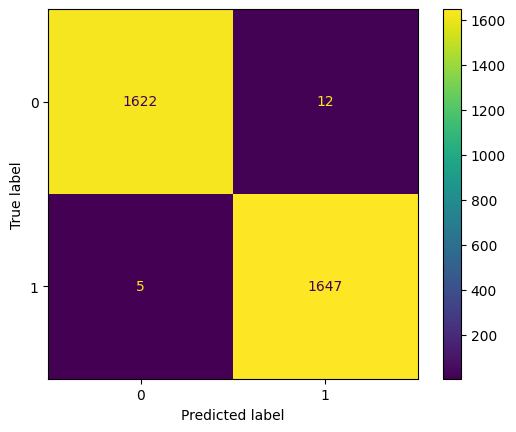

In [35]:
cnf_mat= confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cnf_mat).plot();

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

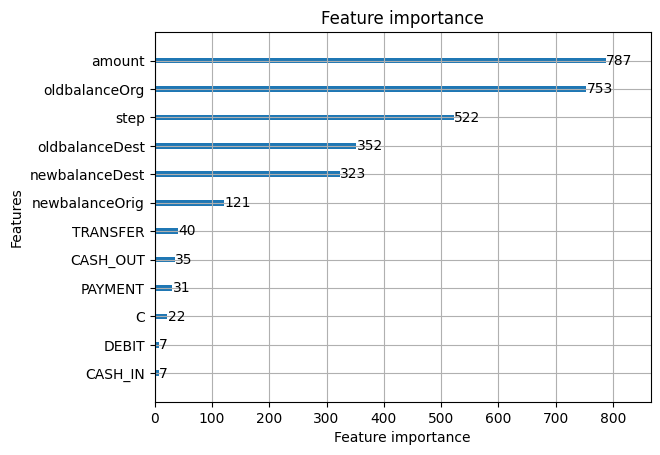

In [36]:
lgb.plot_importance(model)

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

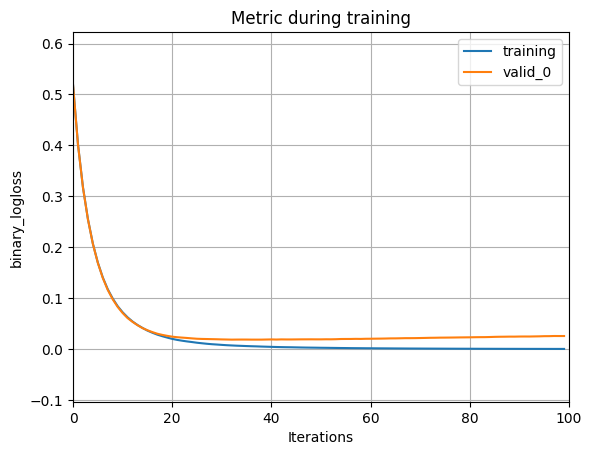

In [37]:
lgb.plot_metric(model)

In [38]:
# import scipy
# # Defining a new model object with a large number of estimators since we will be using early stopping
# model = lgb.LGBMRegressor(n_estimators=10000, n_jobs=-1, random_state=46)

# # Define the parameter distributions for hyperparameter tuning
# # Using this guide: https://towardsdatascience.com/beginners-guide-to-the-must-know-lightgbm-hyperparameters-a0005a812702
# # Parameter documentation: https://lightgbm.readthedocs.io/en/latest/Parameters.html
# param_distributions = {
#     "learning_rate": scipy.stats.uniform(loc=0.003, scale=0.19),  # Default is 0.1. Ranges from loc to loc+scale.
#     "num_leaves": scipy.stats.randint(8, 256),  # Default is 31
#     "max_depth": np.append(-1, np.arange(3, 16)),  # Default is -1
#     "min_child_samples": scipy.stats.randint(5, 300),  # Default is 20. AKA min_data_in_leaf.
#     "subsample": scipy.stats.uniform(loc=0.5, scale=0.5),  # Default is 1. AKA bagging_fraction.
#     "colsample_bytree": scipy.stats.uniform(loc=0.5, scale=0.5),  # Default is 1.0. AKA feature_fraction.
#     "reg_alpha": [0, 0.01, 1, 2, 5, 7, 10, 50, 100],  # Default is 0. AKA lambda_l1.
#     "reg_lambda": [0, 0.01, 1, 5, 10, 20, 50, 100]  # Default is 0. AKA lambda_l2.
# }
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)
# # Configure the randomized search
# random_search = RandomizedSearchCV(model,
#                                    param_distributions=param_distributions,
#                                    n_iter=40,
#                                    cv=3,
#                                    # cv=sklearn.model_selection.ShuffleSplit(n_splits=1, test_size=.25, random_state=46),  # Train/test alternative to k-folds
#                                    scoring="neg_mean_squared_error",
#                                    n_jobs=-1)

# # Perform the randomized search with early stopping
# random_search.fit(X_train, y_train,
#                   eval_set=[(X_val, y_val)],
#                   callbacks=[lgb.early_stopping(20)])

# # Extract the parameters from the best model to re-train the model
# # Update the number of estimators to the best iteration from early stopping
# best_model = random_search.best_estimator_
# optimal_params = best_model.get_params()
# optimal_params["n_estimators"] = best_model.best_iteration_

# # Re-train the tuned model
# model = lgb.LGBMRegressor(**optimal_params)  # Inherits n_jobs and random_state from above
# model.fit(X_train, y_train)
# print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
# print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))
# y_pred = model.predict(X_test)

## SVM MODEL

In [39]:
# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(kernel='rbf',class_weight='balanced', probability=True,gamma=0.1)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

ROCAUC score: 0.8095157829536395
Accuracy score: 0.8094948265368229
F1 score: 0.8096107055961071


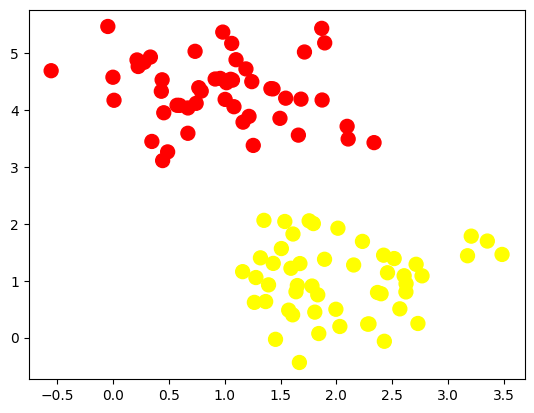

In [40]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn');

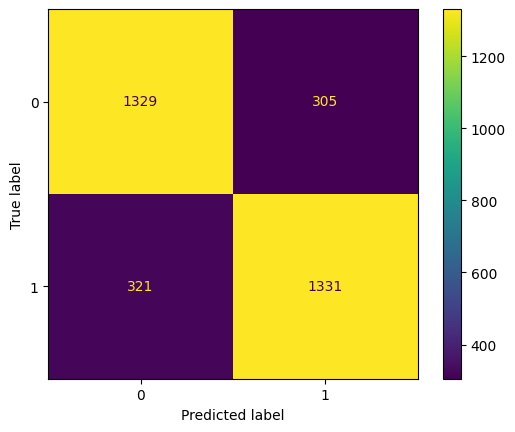

In [41]:
cnf_mat= confusion_matrix(y_test,svc_predict)
ConfusionMatrixDisplay(confusion_matrix=cnf_mat).plot();

##KERAS(NEURAL NETWORK)

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(128, input_shape=(14,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert X_train and y_train to TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)

# fit the keras model on the dataset
model.fit(X_train_tensor, y_train_tensor, epochs=80, batch_size=10)

Epoch 1/80
1314/1314 [==============================] - 3s 2ms/step - loss: 0.3452 - accuracy: 0.8285
Epoch 2/80
1314/1314 [==============================] - 4s 3ms/step - loss: 0.2680 - accuracy: 0.8741
Epoch 3/80
1314/1314 [==============================] - 5s 3ms/step - loss: 0.2294 - accuracy: 0.8961
Epoch 4/80
1314/1314 [==============================] - 3s 2ms/step - loss: 0.2083 - accuracy: 0.9075
Epoch 5/80
1314/1314 [==============================] - 3s 2ms/step - loss: 0.1935 - accuracy: 0.9148
Epoch 6/80
1314/1314 [==============================] - 3s 2ms/step - loss: 0.1845 - accuracy: 0.9186
Epoch 7/80
1314/1314 [==============================] - 4s 3ms/step - loss: 0.1713 - accuracy: 0.9251
Epoch 8/80
1314/1314 [==============================] - 5s 4ms/step - loss: 0.1659 - accuracy: 0.9278
Epoch 9/80
1314/1314 [==============================] - 3s 2ms/step - loss: 0.1544 - accuracy: 0.9355
Epoch 10/80
1314/1314 [==============================] - 3s 2ms/step - loss: 0.146

In [72]:
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)
_, accuracy = model.evaluate(X_test_tensor, y_test_tensor)
print('Accuracy: %.2f' % (accuracy*100))

103/103 [==============================] - 0s 2ms/step - loss: 0.0635 - accuracy: 0.9790
Accuracy: 97.90
